In [17]:
import scanpy as sc
from muon import atac as ac
import numpy as np
from scipy.sparse import csr_matrix

In [2]:
adata_rna = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/multiome/GLI3_KO_multiome_18d_srt_rna.h5ad")
adata_atac = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/multiome/GLI3_KO_multiome_18d_srt_peaks.h5ad")
adata_activity = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/multiome/GLI3_KO_multiome_18d_srt_activity.h5ad")

In [12]:
adata_atac.obs = adata_rna.obs
adata_activity.obs = adata_rna.obs

In [13]:
adata_src = adata_rna[adata_rna.obs["orig.ident"]=="GLI3_WT_A4_day19"]
adata_tgt = adata_atac[adata_atac.obs["orig.ident"]=="GLI3_KO_D3_day19"]

In [28]:
sc.pp.normalize_total(adata_src)
sc.pp.log1p(adata_src)

sc.pp.normalize_total(adata_tgt)
sc.pp.log1p(adata_tgt)


/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [29]:
rng = np.random.default_rng(0)
n_cells_source = adata_src.n_obs

n_samples_train_source = int(n_cells_source * 0.6)
n_samples_test_source = n_cells_source - n_cells_source

inds_train_source = np.asarray(rng.choice(n_cells_source, (n_samples_train_source,), replace=False))
inds_test_source = list(set(list(range(n_cells_source))) - set(np.asarray(inds_train_source)))

In [30]:
rng = np.random.default_rng(0)
n_cells_target = adata_tgt.n_obs

n_samples_train_target = int(n_cells_target * 0.6)
n_samples_test_target = n_cells_target - n_cells_target

inds_train_target = np.asarray(rng.choice(n_cells_target, (n_samples_train_target,), replace=False))
inds_test_target = list(set(list(range(n_cells_target))) - set(np.asarray(inds_train_target)))

In [31]:
adata_src_train = adata_src[inds_train_source]
adata_tgt_train = adata_tgt[inds_train_target]

adata_src_test = adata_src[inds_test_source]
adata_tgt_test = adata_tgt[inds_test_target]

In [ ]:
adata_src_train.varm["X_train_mean"] = adata_src_final.X.mean(axis=0).T

In [ ]:
train_mean = adata_train.varm["X_train_mean"].T
adata_train_final.layers["centered_X"] = csr_matrix(adata_train_final.X.A - train_mean)

In [106]:
adata_rna.layers["raw_counts"] = adata_rna.X.copy()

In [107]:
sc.pp.normalize_total(adata_rna)
sc.pp.log1p(adata_rna)
sc.pp.pca(adata_rna)

In [108]:
sc.pp.neighbors(adata_rna)
sc.tl.umap(adata_rna)

In [109]:
adata_rna.obs["is_KO"] = adata_rna.obs["is_KO"].astype("category") 

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid s

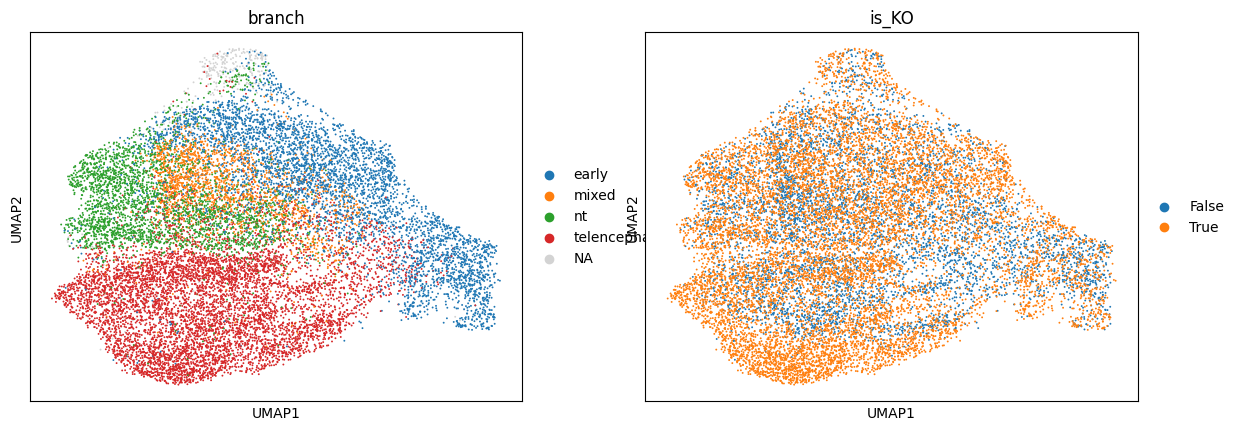

In [110]:
sc.pl.umap(adata_rna, color=["branch", "is_KO"])

In [111]:
adata_atac.obs = adata_rna.obs

In [112]:
adata_atac.layers["raw_peaks"] = adata_atac.X.copy()

In [113]:
ac.pp.tfidf(adata_atac, scale_factor=1e4)
ac.tl.lsi(adata_atac)

In [114]:
for comp in range(50):
    print(np.corrcoef(adata_atac.obsm["X_lsi"][:,comp], adata_atac.obs["nCount_ATAC"].values)[0,1])

-0.8679544293553081
0.14580609432209027
-0.06985723112538468
0.01000547312783866
0.05848297141114187
-0.028515554287151097
0.051628561897141864
0.016581625236292627
-0.04852665458454529
0.193533138159387
0.01689892326911445
-0.04624059316870884
-0.14115336779635673
-0.08429852099197277
-0.007419725099647812
0.003471251227354449
-0.06689452661221519
0.04035319969376293
0.06107642887671137
0.08680338242289376
0.01815860164376168
0.0047691783287028685
-0.027559898899621547
0.019128771247994197
-0.10184947096227731
0.011202713252592967
0.014956016488966519
0.02681492668919242
-0.002438320581707592
-0.007237939505376861
-0.006960326635490853
-0.11255262274108163
0.002084202832943327
0.025507724677112514
-0.061557958978396415
0.045556316985669525
-0.009716691441307901
-0.022265144157002714
0.010499624252165694
-0.027907313330849597
0.016624877514510007
-0.03972744852469276
0.009284126194209746
0.005616340756318128
-0.028535049710448852
0.00929102653158206
-0.025162340895111213
0.030709140770

In [115]:
adata_atac.obsm["X_lsi_red"] = adata_atac.obsm["X_lsi"][:,:-1]

In [116]:
sc.pp.neighbors(adata_atac, use_rep="X_lsi_red")

In [117]:
sc.tl.umap(adata_atac)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid s

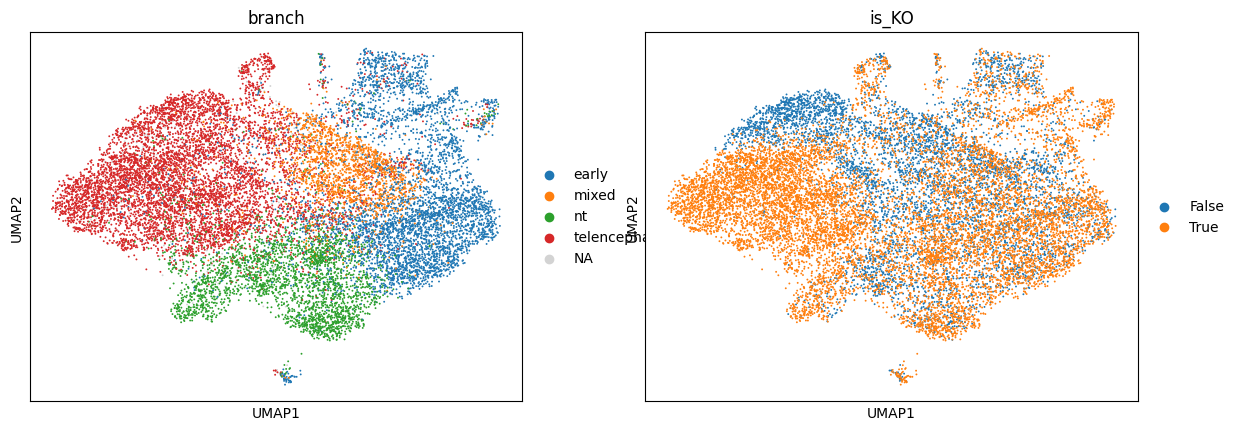

In [118]:
sc.pl.umap(adata_atac, color=["branch", "is_KO"])

In [119]:
adata_atac

AnnData object with n_obs × n_vars = 16119 × 348444
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nCount_peaks', 'nFeature_peaks', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.6', 'seurat_clusters', 'nCount_css', 'nFeature_css', 'transfered_lineage', 'predicted.id', 'prediction.score.nt', 'prediction.score.early', 'prediction.score.telencephalon', 'prediction.score.ctx', 'prediction.score.ge', 'prediction.score.other', 'prediction.score.max', 'is_KO', 'nCount_module_peaks_chromvar', 'nFeature_module_peaks_chromvar', 'nCount_module_score', 'nFeature_module_score', 'nCount_module_score_neg', 'nFeature_module_score_neg', 'nCount_gene_activity', 'nFeature_gene_activity', 'branch'
    uns: 'lsi', 'neighbors', 'umap', 'branch_colors', 'is_KO_colors'
    obsm: 'X_lsi', 'X_lsi_red', 'X_umap'
    varm: 'LSI'
    layers: 'raw_peaks'
    obsp: 'di

In [120]:
adata_activity.obs = adata_rna.obs

In [121]:
len(set(adata_activity.var_names).intersection(adata_rna.var_names))


18652

In [122]:
adata_activity.layers["raw_activity"] = adata_activity.X.copy()

In [123]:
sc.pp.normalize_total(adata_activity)
sc.pp.log1p(adata_activity)
sc.pp.pca(adata_activity)
sc.pp.neighbors(adata_activity)
sc.tl.umap(adata_activity)

In [124]:
adata_activity.obs = adata_rna.obs

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid s

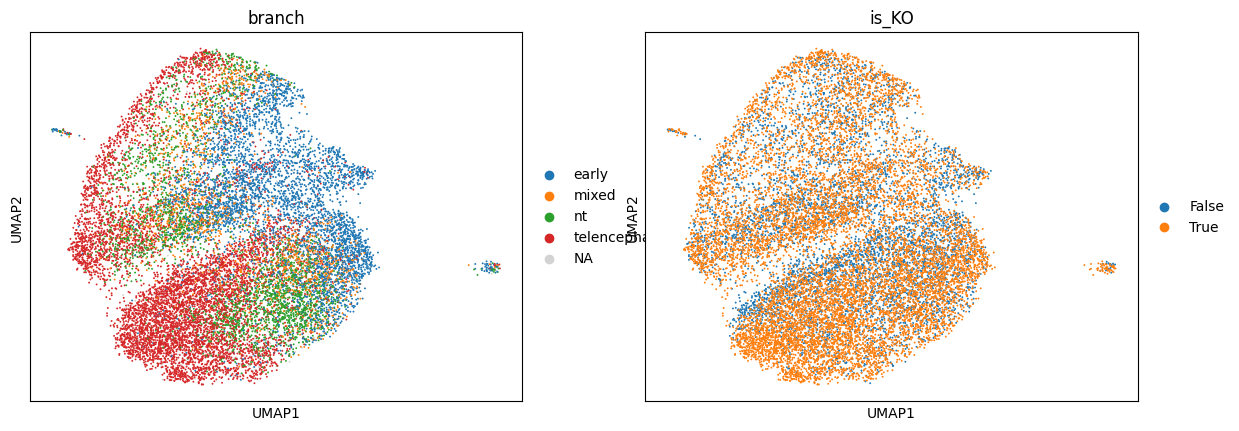

In [125]:
sc.pl.umap(adata_activity, color=["branch", "is_KO"])

In [126]:
adata_rna.write("/home/icb/dominik.klein/tmp/GLI3_KO_multiome_18d_srt_rna_processed.h5ad")
adata_atac.write("/home/icb/dominik.klein/tmp/GLI3_KO_multiome_18d_srt_peaks_processed.h5ad")
adata_activity.write("/home/icb/dominik.klein/tmp/GLI3_KO_multiome_18d_srt_activity_processed.h5ad")

# old stuff

In [66]:
adata_rna_copy = adata_rna[:, list(set(adata_activity.var_names).intersection(adata_rna.var_names))]

In [67]:
adata_rna_copy

View of AnnData object with n_obs × n_vars = 16119 × 18652
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nCount_peaks', 'nFeature_peaks', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.6', 'seurat_clusters', 'nCount_css', 'nFeature_css', 'transfered_lineage', 'predicted.id', 'prediction.score.nt', 'prediction.score.early', 'prediction.score.telencephalon', 'prediction.score.ctx', 'prediction.score.ge', 'prediction.score.other', 'prediction.score.max', 'is_KO', 'nCount_module_peaks_chromvar', 'nFeature_module_peaks_chromvar', 'nCount_module_score', 'nFeature_module_score', 'nCount_module_score_neg', 'nFeature_module_score_neg', 'nCount_gene_activity', 'nFeature_gene_activity', 'branch'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'branch_colors', 'is_KO_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivi

In [78]:
import anndata
adata_concat = anndata.concat((adata_rna_copy, adata_activity), label="modality")

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [79]:
sc.pp.pca(adata_concat)
sc.pp.neighbors(adata_concat)
sc.tl.umap(adata_concat)

In [81]:
adata_concat.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,...,nCount_module_peaks_chromvar,nFeature_module_peaks_chromvar,nCount_module_score,nFeature_module_score,nCount_module_score_neg,nFeature_module_score_neg,nCount_gene_activity,nFeature_gene_activity,branch,modality
GLI3_WT_A4_day19_AAACAGCCACCATATG-1,GLI3_WT_A4_day19,8656.0,3506,20.078558,14136.0,11624,0.829001,0.91,3.702465,0.10,...,NaN,-2147483648,40.588248,374,44.434449,367,17953.0,9109,telencephalon,0
GLI3_WT_A4_day19_AAACAGCCAGGACCAA-1,GLI3_WT_A4_day19,14127.0,4993,12.111559,11607.0,9747,0.859330,0.94,3.865037,0.18,...,NaN,-2147483648,59.686768,416,69.919768,407,16616.0,8367,early,0
GLI3_WT_A4_day19_AAACAGCCAGGTTCAC-1,GLI3_WT_A4_day19,10395.0,3629,15.228475,10444.0,8955,0.702764,0.58,3.817003,0.15,...,NaN,-2147483648,51.735202,392,66.914177,403,12578.0,7420,mixed,0
GLI3_WT_A4_day19_AAACAGCCATAGCGAG-1,GLI3_WT_A4_day19,3714.0,2005,2.880991,6258.0,5695,0.674545,0.48,3.770143,0.13,...,NaN,-2147483648,51.569342,399,59.958779,379,7333.0,5189,telencephalon,0
GLI3_WT_A4_day19_AAACAGCCATCAGTAT-1,GLI3_WT_A4_day19,5446.0,2281,11.586485,14390.0,11146,0.633178,0.32,3.578524,0.06,...,NaN,-2147483648,65.088366,446,68.381380,408,18448.0,8488,early,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GLI3_KO_D3_day19_TTTGTGTTCGTGCTTC-1,GLI3_KO_D3_day19,18332.0,5999,13.348244,55114.0,32201,0.651100,0.39,4.100098,0.38,...,NaN,-2147483648,54.353078,441,60.246146,409,68778.0,14848,early,1
GLI3_KO_D3_day19_TTTGTTGGTAAGCTTG-1,GLI3_KO_D3_day19,10405.0,3600,26.794810,23637.0,17482,0.787002,0.83,4.514318,0.77,...,NaN,-2147483648,38.230101,379,41.484000,367,27380.0,10872,nt,1
GLI3_KO_D3_day19_TTTGTTGGTAATGGAA-1,GLI3_KO_D3_day19,4137.0,2316,6.188059,7376.0,6516,0.594370,0.19,4.092459,0.37,...,NaN,-2147483648,37.035923,379,35.206572,358,8293.0,5553,telencephalon,1
GLI3_KO_D3_day19_TTTGTTGGTGTCACGG-1,GLI3_KO_D3_day19,5778.0,2661,0.588439,15668.0,11745,0.677537,0.49,4.216939,0.49,...,NaN,-2147483648,55.305450,399,53.864148,392,19247.0,8681,early,1


/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid s

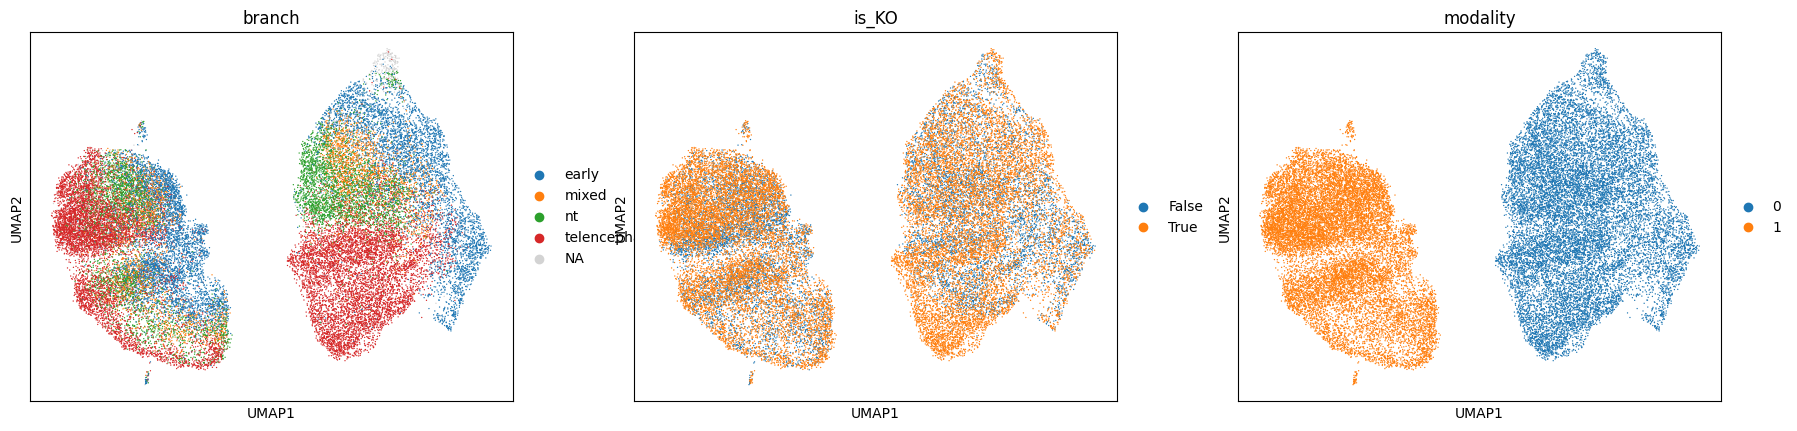

In [82]:
sc.pl.umap(adata_concat, color=["branch", "is_KO", "modality"])

In [83]:
from moscot.problems.generic import SinkhornProblem

In [84]:
sp = SinkhornProblem(adata_concat)

In [129]:
sp = sp.prepare("modality", joint_attr="X_scVI")

In [130]:
sp = sp.solve()

INFO     Solving `1` problems                                                                                      
INFO     Solving problem OTProblem[stage='prepared', shape=(16119, 16119)].                                        


In [131]:
df = sp.cell_transition("0", "1", "branch", "branch")

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/moscot/base/problems/_mixins.py:506: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_dist = df[df[annotation_key].isin(annotations_2)].groupby(annotation_key).sum(numeric_only=True)
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/moscot/base/problems/_mixins.py:506: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_dist = df[df[annotation_key].isin(annotations_2)].groupby(annotation_key).sum(numeric_only=True)
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packag

In [132]:
df

,early,mixed,nt,telencephalon
early,0.659011,0.200834,0.203194,0.092117
mixed,0.083556,0.439706,0.061004,0.066347
nt,0.097790,0.111154,0.566184,0.087463
telencephalon,0.159643,0.248306,0.169617,0.754072


In [91]:
df

,early,mixed,nt,telencephalon
early,0.605897,0.243374,0.214497,0.106830
mixed,0.087356,0.290375,0.086236,0.095204
nt,0.081466,0.132230,0.424691,0.150020
telencephalon,0.225282,0.334021,0.274576,0.647946


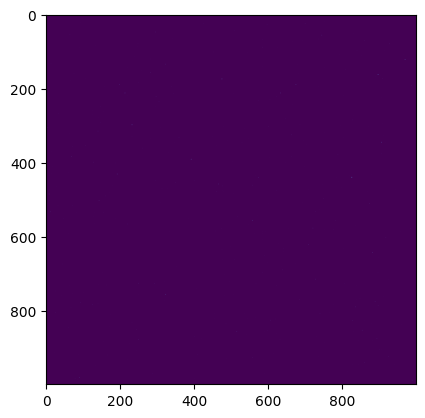

In [94]:
import matplotlib.pyplot as plt
plt.imshow(np.asarray(sp["0", "1"].solution.transport_matrix)[:1000, :1000])

In [133]:
tmat = np.asarray(sp["0", "1"].solution.transport_matrix)
diagonal_entries = np.diag(tmat)
comparison = tmat >= diagonal_entries[:, np.newaxis]
count_larger_than_diagonal = np.sum(comparison, axis=1)

In [134]:
count_larger_than_diagonal.mean()

15573.751659532229

In [135]:
np.median(count_larger_than_diagonal)

16119.0

In [104]:
len(count_larger_than_diagonal)

16119

In [97]:
count_larger_than_diagonal.mean()

3634.884235994789

In [98]:
count_larger_than_diagonal.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

In [99]:
np.median(count_larger_than_diagonal)

1916.0

In [127]:
bdata=sc.read_h5ad("/home/icb/dominik.klein/tmp/tmp_integrated.h5ad")

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [128]:
adata_concat.obsm["X_scVI"] = bdata.obsm["X_scVI"]